      ___   _
     |_ _| | |_    ___   ___    ___
      | |  | __|  / _ \ / __|  / _ \
      | |  | |_  |  __/ \__ \ | (_) |
     |___|  \__|  \___| |___/  \___/



<h1><strong>Classification Challenge: Mejorando la Gestión de Quejas con Machine Learning</strong></h1>

<hr>
<p>Bienvenid@ al Classification Challenge</p>
<h2>Descripción</h2>

<p>En el ámbito corporativo, enfrentar y resolver desafíos diarios es esencial para mejorar la experiencia del cliente y optimizar las operaciones. Un desafío común es la adecuada gestión y clasificación de las quejas de los clientes. Para abordar esta problemática de manera efectiva, disponemos de un dataset inicial que será empleado para entrenar un modelo de machine learning. Este modelo tiene como objetivo predecir la categoría adecuada para cada nueva queja recibida, utilizando el conocimiento derivado de casos anteriores.

Es importante mencionar que el dataset proporcionado, denominado `tickets_classification_eng.json` (Puedes encontrar este dataset en la carpeta `data/raw_data`), no está limpio y requerirá un proceso de preparación antes de ser utilizado para el entrenamiento del modelo. Este dataset final deberá está formado por las siguientes columnas:

    complaint_what_happened - El contenido textual de la queja, que proporciona detalles sobre el incidente o problema experimentado por el cliente.
    ticket_classification - Una combinación de las categorías de producto y subproducto involucradas, que clasifica la queja en un contexto más amplio.

Para asegurarnos de que el dataset esté listo para su uso, es crucial seguir los procedimientos que se expondran adelante para seleccionar, limpiar y preparar adecuadamente los datos. Una vez que se haya completado este proceso, será necesario guardar el dataset limpio para asegurar que el modelo de machine learning pueda ser entrenado con datos precisos y confiables. 

La implementación de este proyecto no solo busca mejorar la eficiencia en la gestión de quejas, sino también permitir que la empresa comprenda mejor las tendencias de los problemas reportados por los clientes, facilitando una respuesta más rápida y adecuada en el futuro.




## Hints
- Utilice la función `json_normalize` del paquete `pandas` [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html) para importar los datos.
- Use este código para importar el json como diccionario en `Python`:
````
import json
with open(file_path, "r") as file:  
    datos = json.load(file)
````
- Para la transformación de datos y obtener el dataset final a trabajar ejecute los comandos de pandas necesarios para aplicar el siguiente procedimiento:

    1. **Selección de Columnas**:
       Empieza seleccionando solo las columnas que contienen la información de la queja, el producto y el subproducto. Las columnas son:
       - `_source.complaint_what_happened`
       - `_source.product`
       - `_source.sub_product`

    2. **Renombrar Columnas**:
       Cambia el nombre de las columnas para que sean más claras y fáciles de manejar:
       - `_source.complaint_what_happened` a `complaint_what_happened`
       - `_source.product` a `category`
       - `_source.sub_product` a `sub_product`

    3. **Creación de Nueva Columna**:
       Añade una nueva columna llamada `ticket_classification` que sea el resultado de concatenar los valores de las columnas `category` y `sub_product`, separados por un signo más. Por ejemplo, si `category` contiene "Banco" y `sub_product` contiene "Cuenta Corriente", entonces `ticket_classification` debería ser "Banco + Cuenta Corriente".
    
    4. **Eliminar Columnas Redundantes**:
       Después de crear la columna `ticket_classification`, elimina las columnas `sub_product` y `category`, ya que su información ahora está encapsulada en la nueva columna.
    
    5. **Limpieza de Datos en Columnas Específicas**:
       Asegúrate de que la columna `complaint_what_happened` no contenga campos vacíos. Reemplaza esos campos vacíos con un valor que indique que los datos están ausentes (como `NaN`).
    
    6. **Eliminación de Filas con Datos Faltantes**:
       Elimina todas las filas que tengan datos faltantes en las columnas críticas, es decir, `complaint_what_happened` y `ticket_classification`.
    
    7. **Reiniciar Índice**:
       Finalmente, reinicia el índice del dataframe para asegurarte de que los índices sean consecutivos, lo cual es útil después de eliminar filas para mantener la consistencia y facilidad de acceso por índice.
    8. **Guardar el DataFrame en un Archivo CSV**:
   Guarda el DataFrame transformado en un archivo CSV. Elige un nombre de archivo que refleje el contenido del DataFrame y decide la ubicación más adecuada para guardar el archivo. Asegúrate de establecer el parámetro para no guardar el índice si no es necesario.


#### Importación de Librerías Necesarias


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

# Librerías para procesamiento de texto
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Para generar nubes de palabras
from wordcloud import WordCloud, STOPWORDS

# Librerías para análisis de n-gramas
from collections import Counter
import re


In [41]:
file_path = '../data/raw_data/tickets_classification_eng.json'

with open(file_path, 'r') as file:
    datos = json.load(file)

# Convertir el JSON a un DataFrame de pandas
df = pd.json_normalize(datos)


In [42]:
df = df[['_source.complaint_what_happened', '_source.product', '_source.sub_product']]


In [43]:
df.rename(columns={
    '_source.complaint_what_happened': 'complaint_what_happened',
    '_source.product': 'category',
    '_source.sub_product': 'sub_product'
}, inplace=True)


In [44]:
df['ticket_classification'] = df['category'] + ' + ' + df['sub_product']


In [45]:
df.drop(columns=['category', 'sub_product'], inplace=True)



In [46]:
df['complaint_what_happened'].replace('', np.nan, inplace=True)
df.dropna(subset=['complaint_what_happened', 'ticket_classification'], inplace=True)


/var/folders/zq/qf312yqs5wnb29fvj3txfrqm0000gn/T/ipykernel_1187/857690592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['complaint_what_happened'].replace('', np.nan, inplace=True)


In [47]:
df.reset_index(drop=True, inplace=True)


#### Análisis Exploratorio de Datos (EDA):

In [48]:
df.to_csv('../data/processed_data/cl_dataset.csv', index=False)
df.head()



,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18963 entries, 0 to 18962
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaint_what_happened  18963 non-null  object
 1   ticket_classification    18963 non-null  object
dtypes: object(2)
memory usage: 296.4+ KB


In [50]:
df.describe()

,complaint_what_happened,ticket_classification
count,18963,18963
unique,18824,78
top,Chase has violated 15 USC 1692 by continuing c...,Credit card or prepaid card + General-purpose ...
freq,11,4918


##### En este paso, procedemos a eliminar aquellas filas que tengan el complaint repetido, ya que equivalen aproximadamente a 100 registros, lo que no afecta a nuestra muestra completa.

In [51]:
# Paso previo: Verificar el número de filas antes de eliminar duplicados
print(f"Número de filas antes de eliminar duplicados: {df.shape[0]}")

# Eliminar filas duplicadas basadas en 'complaint_what_happened'
df.drop_duplicates(subset=['complaint_what_happened'], inplace=True)

# Reiniciar el índice
df.reset_index(drop=True, inplace=True)

# Paso posterior: Verificar el número de filas después de eliminar duplicados
print(f"Número de filas después de eliminar duplicados: {df.shape[0]}")

Número de filas antes de eliminar duplicados: 18963
Número de filas después de eliminar duplicados: 18824


#### Análisis de la Variable Objetivo

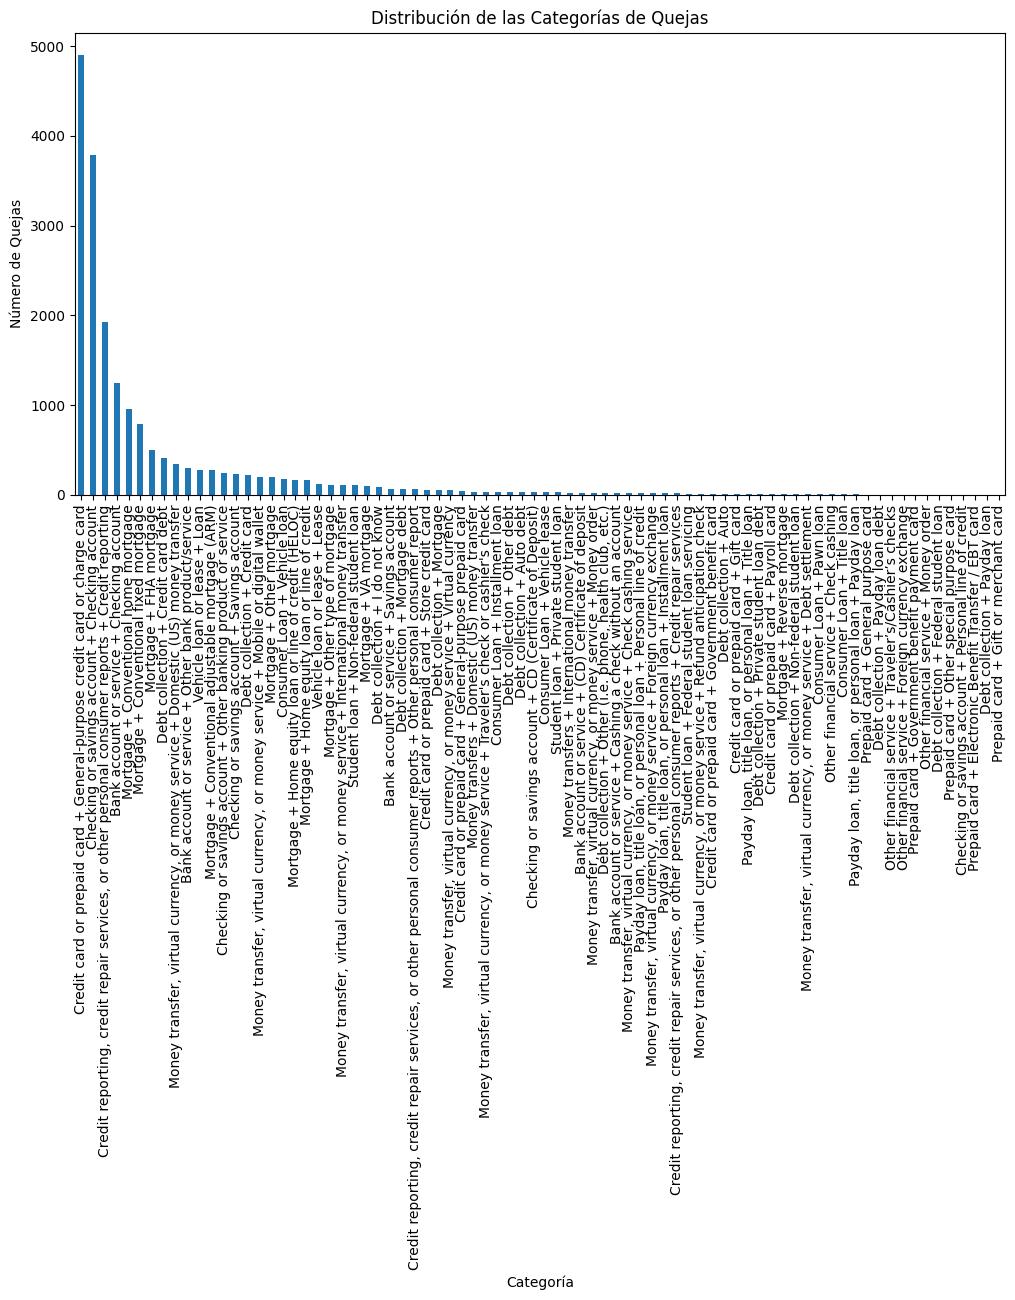

In [52]:
plt.figure(figsize=(12,6))
df['ticket_classification'].value_counts().plot(kind='bar')
plt.title('Distribución de las Categorías de Quejas')
plt.xlabel('Categoría')
plt.ylabel('Número de Quejas')
plt.show()


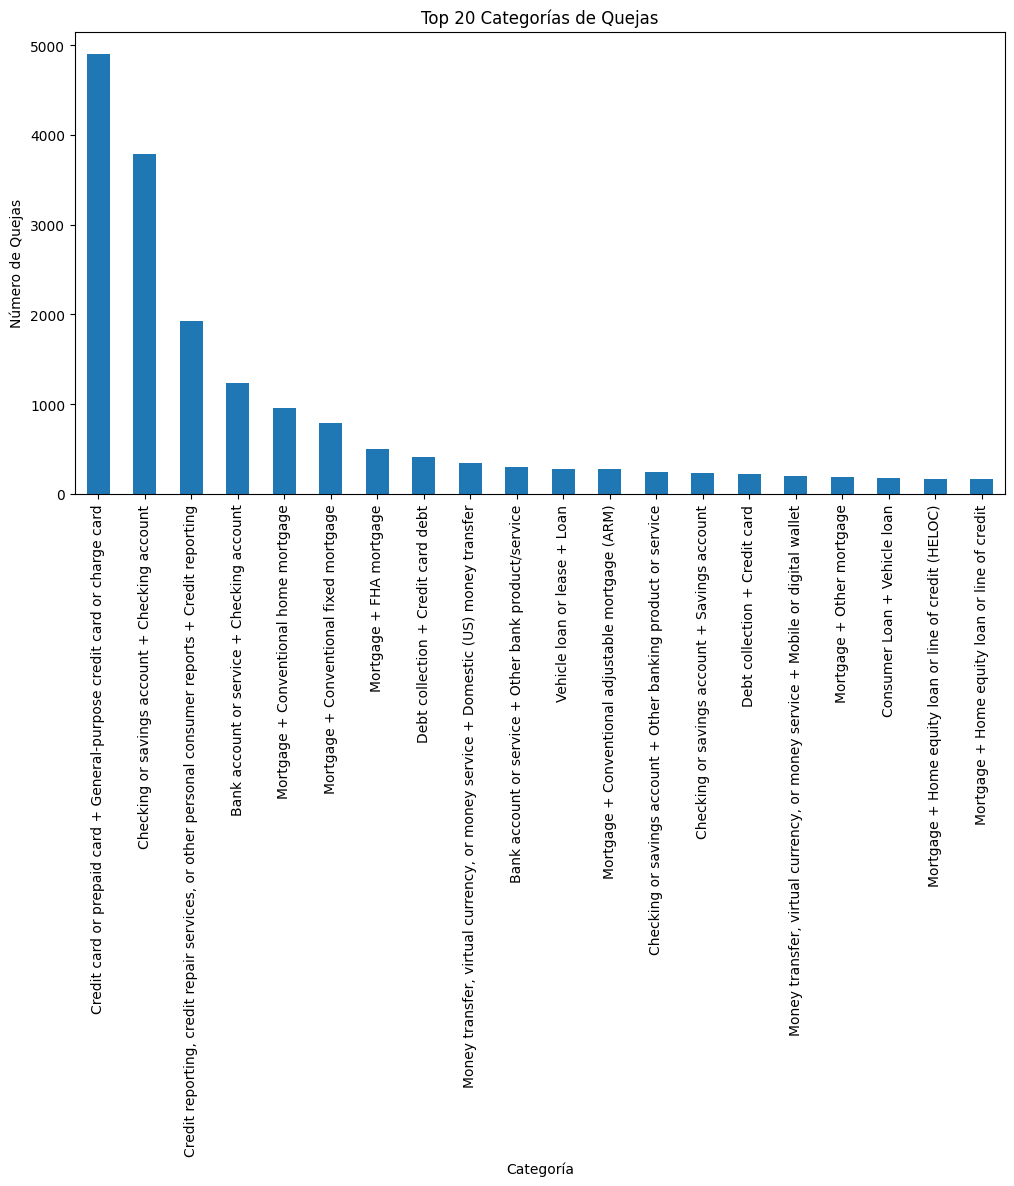

In [53]:
top_categories = df['ticket_classification'].value_counts().nlargest(20)

plt.figure(figsize=(12,6))
top_categories.plot(kind='bar')
plt.title('Top 20 Categorías de Quejas')
plt.xlabel('Categoría')
plt.ylabel('Número de Quejas')
plt.show()


In [54]:
num_classes = df['ticket_classification'].nunique()
print(f"Número total de categorías únicas: {num_classes}")


Número total de categorías únicas: 78


Podemos notar una amplia variedad de clases de quejas. Son muchísimas de hecho.

#### Análisis de los Textos de las Quejas

In [55]:
df['text_length'] = df['complaint_what_happened'].apply(lambda x: len(x.split()))


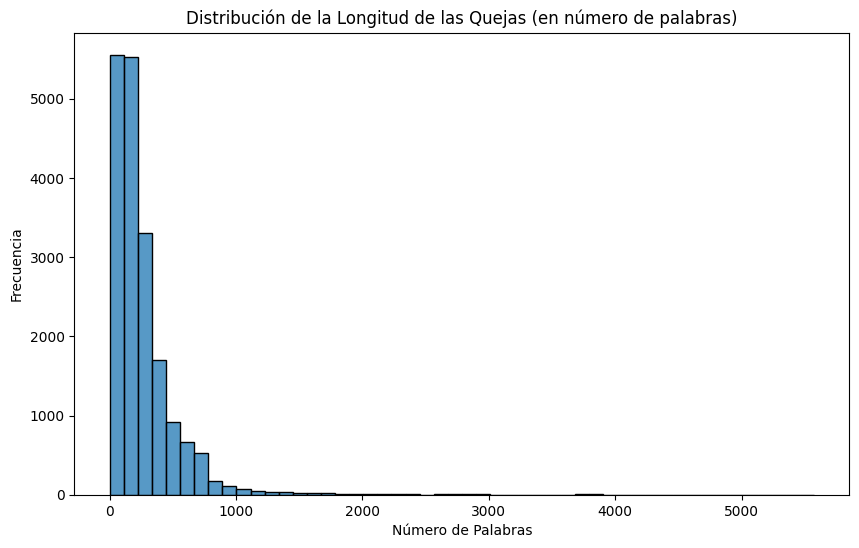

In [56]:
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=50)
plt.title('Distribución de la Longitud de las Quejas (en número de palabras)')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()


In [57]:
df['text_length'].describe()


count    18824.000000
mean       258.958882
std        280.082691
min          1.000000
25%         99.000000
50%        184.000000
75%        324.000000
max       5573.000000
Name: text_length, dtype: float64

#### Preprocesamiento Inicial

Función de Limpieza y Lematización

In [58]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_and_lemmatize_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar URLs
    text = re.sub(r'http\S+', '', text)
    # Eliminar caracteres no alfabéticos
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenización
    words = text.split()
    # Eliminar stopwords y lematizar
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Unir palabras limpias
    return ' '.join(words)

# Aplicar la función al dataset
df['cleaned_text'] = df['complaint_what_happened'].apply(clean_and_lemmatize_text)


#### Wordcloud (Para ver que palabras son las más frecuentes)

In [59]:
text = ' '.join(df['cleaned_text'])


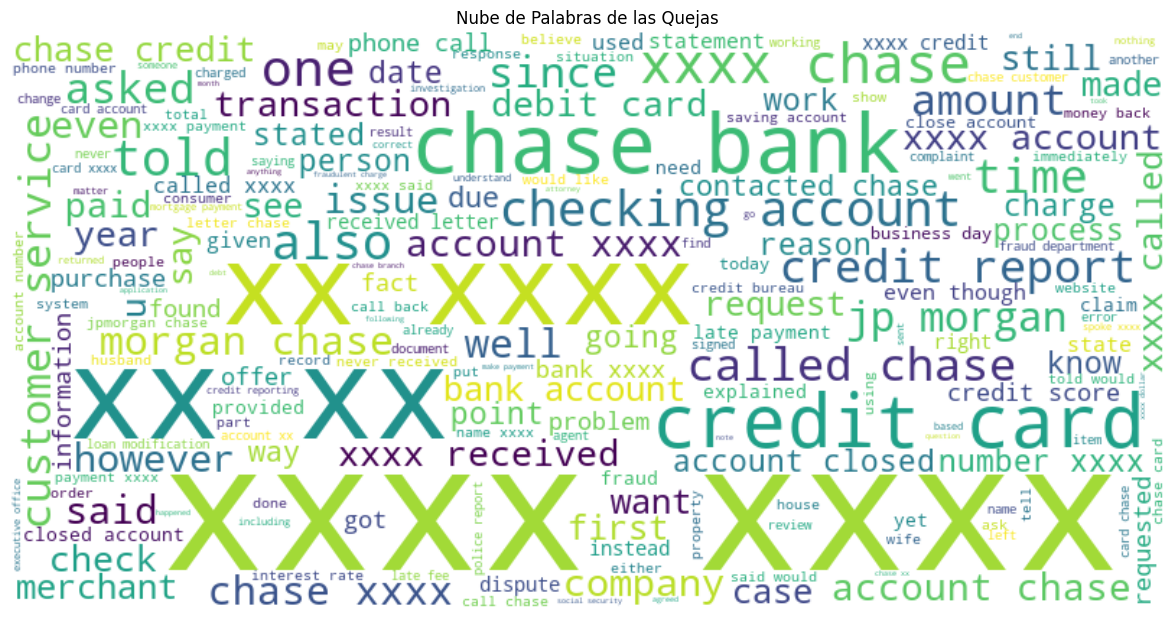

In [60]:
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de las Quejas')
plt.show()


Al parecer hay complaints que están rellenadas con strings que no nos reflejan nada. Evaluaremos que tanta parte del dataset cuenta con esta respuesta, y si es posible se hará su eliminación.

### Código para limpiar las palabras con "X" repetidas:

In [61]:
# Regex para eliminar palabras con 2 o más "X" (cualquier combinación de mayúsculas y minúsculas)
def clean_x_words(text):
    if isinstance(text, str):  # Verificar si el valor es texto
        return re.sub(r'\b[xX]{2,}\b', '', text)  # Eliminar palabras con 2+ X
    return text  # Si no es texto, retornarlo como está

# Aplicar limpieza a la columna "complaint_what_happened" (ajusta el nombre si es necesario)
df['complaint_what_happened'] = df['complaint_what_happened'].apply(clean_x_words)

# Guardar el dataset limpio (opcional)
df.to_csv('../data/processed_data/cld_dataset.csv', index=False)

# Mostrar ejemplos
print(df['complaint_what_happened'].head())


0    Good morning my name is   and I appreciate it ...
1    I upgraded my   card in //2018 and was told by...
2    Chase Card was reported on //2019. However, fr...
3    On //2018, while trying to book a     ticket, ...
4    my grand son give me check for {$1600.00} i de...
Name: complaint_what_happened, dtype: object


##### Análisis de Palabras más comunes


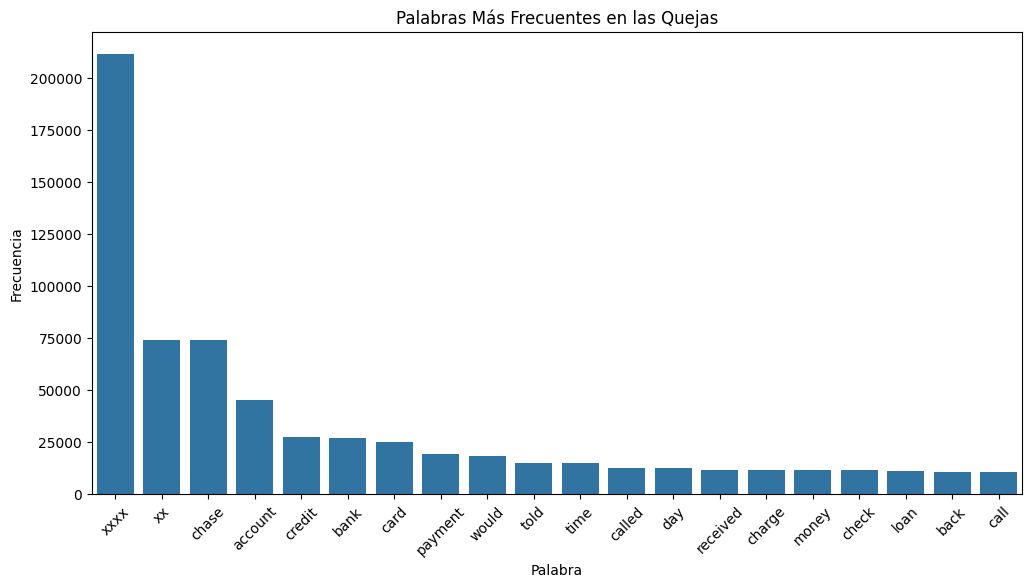

In [62]:
from collections import Counter

word_list = text.split()
word_counts = Counter(word_list)
common_words = word_counts.most_common(20)

# Convertir a DataFrame para facilitar la visualización
common_words_df = pd.DataFrame(common_words, columns=['Palabra', 'Frecuencia'])

plt.figure(figsize=(12,6))
sns.barplot(x='Palabra', y='Frecuencia', data=common_words_df)
plt.title('Palabras Más Frecuentes en las Quejas')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


-Análisis de N-gramas

In [63]:
def get_ngrams(text, n):
    tokens = [token for token in text.split(" ") if token != ""]
    n_grams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(n_gram) for n_gram in n_grams]


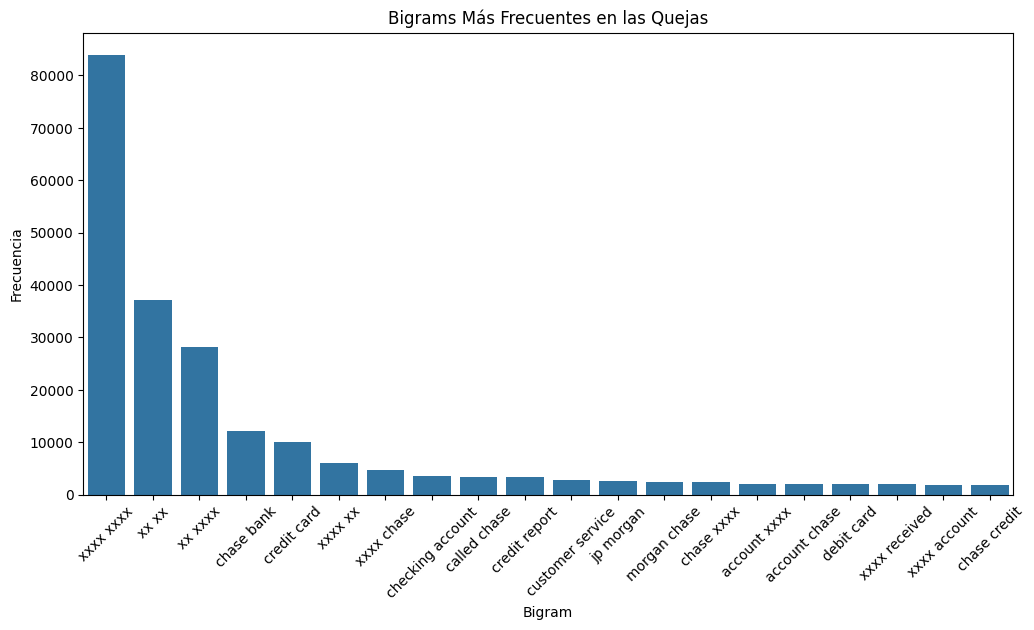

In [64]:

bigrams = []

for doc in df['cleaned_text']:
    bigrams.extend(get_ngrams(doc, 2))

bigram_counts = Counter(bigrams)
common_bigrams = bigram_counts.most_common(20)

# Convertir a DataFrame
common_bigrams_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Frecuencia'])

plt.figure(figsize=(12,6))
sns.barplot(x='Bigram', y='Frecuencia', data=common_bigrams_df)
plt.title('Bigrams Más Frecuentes en las Quejas')
plt.xlabel('Bigram')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()



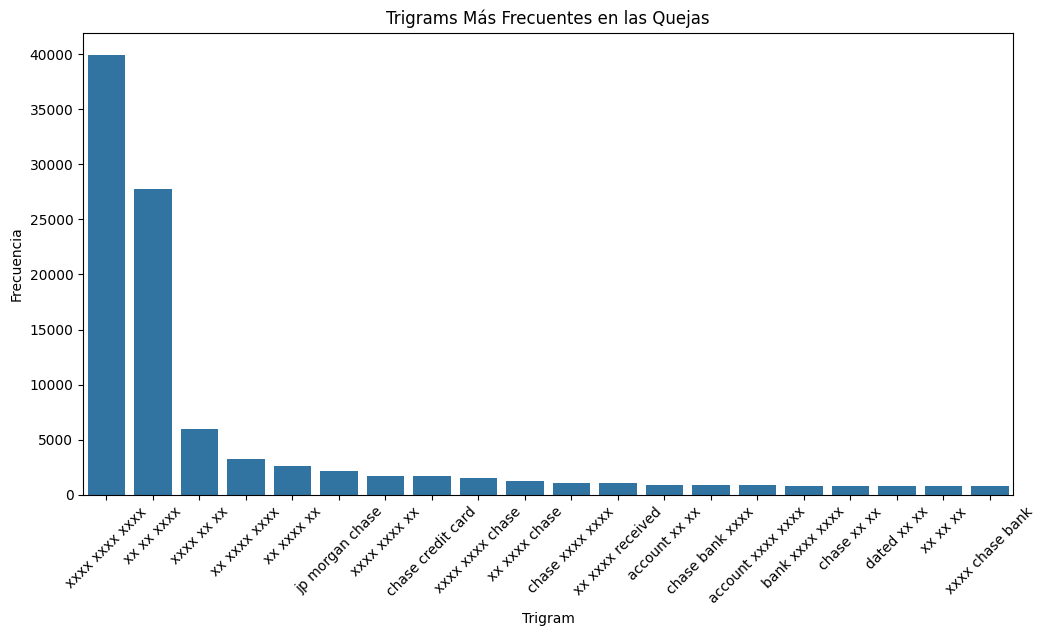

In [65]:
trigrams = []

for doc in df['cleaned_text']:
    trigrams.extend(get_ngrams(doc, 3))

trigram_counts = Counter(trigrams)
common_trigrams = trigram_counts.most_common(20)

# Convertir a DataFrame
common_trigrams_df = pd.DataFrame(common_trigrams, columns=['Trigram', 'Frecuencia'])

plt.figure(figsize=(12,6))
sns.barplot(x='Trigram', y='Frecuencia', data=common_trigrams_df)
plt.title('Trigrams Más Frecuentes en las Quejas')
plt.xlabel('Trigram')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


##### Análisis de Sentimientos

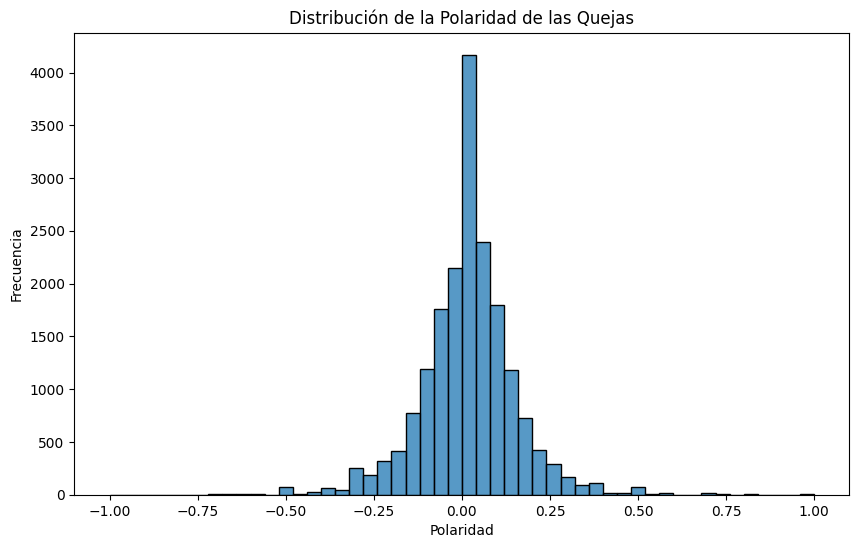

In [66]:
from textblob import TextBlob

# Función para obtener la polaridad
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['cleaned_text'].apply(get_polarity)

# Visualizamos la distribución de la polaridad
plt.figure(figsize=(10,6))
sns.histplot(df['polarity'], bins=50)
plt.title('Distribución de la Polaridad de las Quejas')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.show()


#### Relación entre Longitud de la Queja y Categoría (categorías más frecuentes)

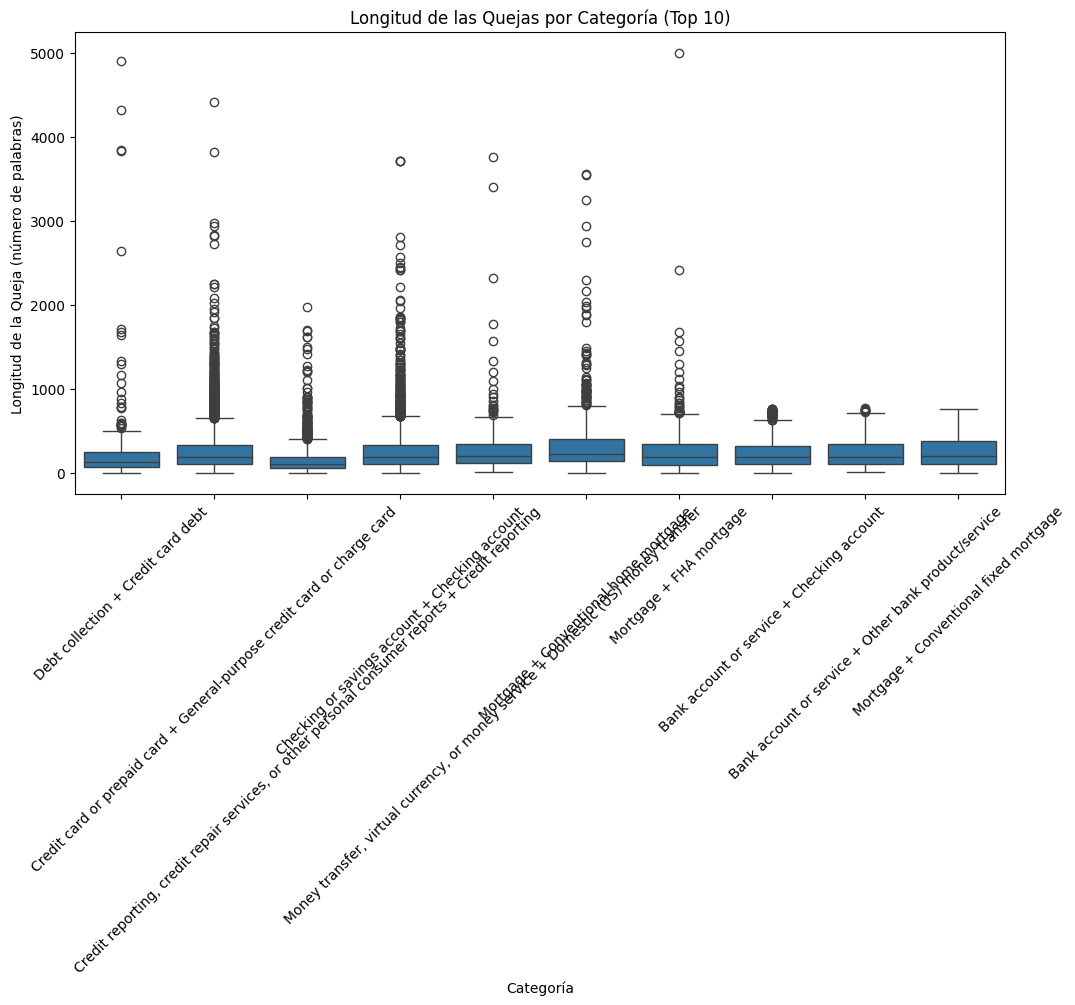

In [67]:
top_categories = df['ticket_classification'].value_counts().nlargest(10).index
df_top = df[df['ticket_classification'].isin(top_categories)]

plt.figure(figsize=(12,6))
sns.boxplot(x='ticket_classification', y='text_length', data=df_top)
plt.title('Longitud de las Quejas por Categoría (Top 10)')
plt.xlabel('Categoría')
plt.ylabel('Longitud de la Queja (número de palabras)')
plt.xticks(rotation=45)
plt.show()


In [68]:
print(df.columns)

Index(['complaint_what_happened', 'ticket_classification', 'text_length',
       'cleaned_text', 'polarity'],
      dtype='object')


In [69]:
from sklearn.metrics import classification_report

def evaluate_model(model, X_test, y_test, le):
    y_pred = model.predict(X_test)

    # Filtrar las etiquetas que realmente están en y_test
    labels_in_test = sorted(set(y_test))

    # Generar el reporte
    report = classification_report(
        y_test,
        y_pred,
        target_names=le.classes_,
        labels=labels_in_test
    )
    
    print(report)
    return report


In [70]:
print("Clases en LabelEncoder:", le.classes_)
print("Clases únicas en y_test:", sorted(set(y_test)))



NameError: name 'le' is not defined